# Overfitting in a Linear Model

In an OLS regression, only the first two regressors (and the constant) are relevant. What happens if we add more and more irrelevant regressors?

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
# np.random.seed(42)

# Define parameters
n_train = 100  # Training sample size
n_test = 100 # Test sample size
n_total = 95   # Total variables: 2 relevant + 10 irrelevant
beta = [1, 1, 1]  # True coefficients: intercept=1, beta1=2 for x1, beta2=3 for x2

# Generate training data
X_train = np.random.randn(n_train, n_total)
y_train = beta[0] + beta[1] * X_train[:, 0] + beta[2] * X_train[:, 1] + np.random.randn(n_train)

# Generate test data
X_test = np.random.randn(n_test, n_total)
y_test = beta[0] + beta[1] * X_test[:, 0] + beta[2] * X_test[:, 1] + np.random.randn(n_test)

In [3]:
# Plot the results
def fitting_plot(n_total, in_sample_mse, out_sample_mse):
    plt.plot(range(1, n_total + 1), in_sample_mse, label='In-sample MSE', marker='o')
    plt.plot(range(1, n_total + 1), out_sample_mse, label='Out-of-sample MSE', marker='o')
    plt.axvline(x=2, color='red', linestyle='--', label='True number of variables (k=2)')
    plt.xlabel('Number of Variables (k)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.axhline(y=1, color='blue', linestyle='--', label='Population noise')
    plt.title('In-sample and Out-of-sample MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
# Initialize lists to store MSE values
in_sample_mse_list = []
out_sample_mse_list = []

# Loop over number of variables 
for k in range(1, n_total+1):
    # Select first k variables
    X_train_k = X_train[:, :k]
    X_test_k = X_test[:, :k]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_k, y_train)
    
    # Compute predictions
    y_train_pred = model.predict(X_train_k)
    y_test_pred = model.predict(X_test_k)
    
    # Calculate MSE
    in_sample_mse = np.mean((y_train - y_train_pred) ** 2)
    out_sample_mse = np.mean((y_test - y_test_pred) ** 2)
    
    # Store MSE values
    in_sample_mse_list.append(in_sample_mse)
    out_sample_mse_list.append(out_sample_mse)

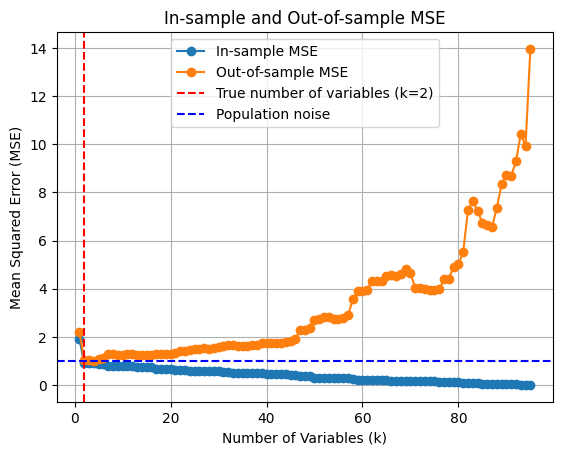

In [5]:
fitting_plot(n_total, in_sample_mse_list, out_sample_mse_list)

## Lasso

We use Lasso to prevent in-sample overfitting

In [6]:
from sklearn.linear_model import Lasso

# Initialize lists to store MSE values
in_sample_mse_lasso = []
out_sample_mse_lasso = []

# Loop over number of variables from 2 to 12
for k in range(1, n_total + 1):
    # Select first k variables
    X_train_k = X_train[:, :k]
    X_test_k = X_test[:, :k]
    
    # Compute lambda as sqrt(log(k)/n_train)
    # I manually tuned the parameter
    lambda_k = 1.0 * np.sqrt(np.log(k) / n_train)
    
    # Initialize and fit Lasso model
    model = Lasso(alpha=lambda_k)
    model.fit(X_train_k, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_k)
    y_test_pred = model.predict(X_test_k)
    
    # Compute MSEs
    in_sample_mse = np.mean((y_train - y_train_pred) ** 2)
    out_sample_mse = np.mean((y_test - y_test_pred) ** 2)
    
    # Store results
    in_sample_mse_lasso.append(in_sample_mse)
    out_sample_mse_lasso.append(out_sample_mse)

    # Extract and print the coefficients
    if k % 30 == 0:
        coefficients = model.coef_
        print(f"For k = {k}, coefficients = {coefficients}")

For k = 30, coefficients = [ 0.82721697  0.84509265  0.         -0.         -0.          0.
 -0.04940365  0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.13582089 -0.
 -0.         -0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.        ]
For k = 60, coefficients = [ 0.80581921  0.82723844  0.         -0.         -0.          0.
 -0.02863656  0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.12060126 -0.
 -0.         -0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0

<ipython-input-6-5895c10b7794>:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train_k, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e+01, tolerance: 2.928e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


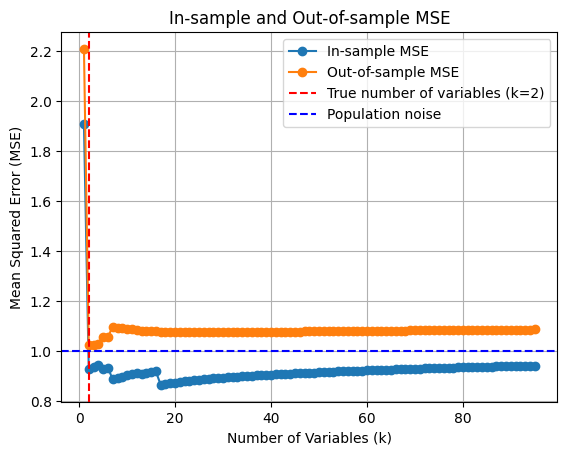

In [7]:
fitting_plot(n_total, in_sample_mse_lasso, out_sample_mse_lasso)

## Ridge regression

The performance is not as good as Lasso.

In [8]:
from sklearn.linear_model import Ridge

in_sample_mse_ridge = []
out_sample_mse_ridge = []

for k in range(1, n_total + 1):
    # Select first k variables
    X_train_k = X_train[:, :k]
    X_test_k = X_test[:, :k]
    
    # Compute lambda as sqrt(log(k)/n_train)
    lambda_k = 50 * np.sqrt(np.log(k) / n_train)
    
    # Initialize and fit Ridge model
    model = Ridge(alpha=lambda_k)
    model.fit(X_train_k, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_k)
    y_test_pred = model.predict(X_test_k)
    
    # Compute MSEs
    in_sample_mse = np.mean((y_train - y_train_pred) ** 2)
    out_sample_mse = np.mean((y_test - y_test_pred) ** 2)
    
    # Store results
    in_sample_mse_ridge.append(in_sample_mse)
    out_sample_mse_ridge.append(out_sample_mse)
    
    # Print coefficients
    if k % 30 == 0:
        coefficients = model.coef_
        print(f"For k = {k}, Ridge coefficients = {coefficients}")

For k = 30, Ridge coefficients = [ 0.86327951  0.91770735  0.08955853 -0.05343111 -0.16524341  0.02329003
 -0.21728643  0.12951666  0.10481364  0.07490104  0.09807921  0.045031
  0.07478066  0.06069572 -0.02438575 -0.06009947 -0.29118893  0.0098129
 -0.0028588  -0.08533627  0.13233567  0.14327574 -0.0673052   0.1221238
  0.0664555  -0.02444709  0.0220654   0.10714518  0.09526959  0.14820197]
For k = 60, Ridge coefficients = [ 0.7015606   0.74866672  0.17157613 -0.05145434 -0.26826997  0.00118285
 -0.29057287  0.06923022  0.15386105  0.25152356  0.19942735  0.00528351
  0.16309539  0.10363913  0.10803775 -0.12352103 -0.27920828  0.08602752
  0.01462662 -0.0638393   0.01731971 -0.03435173 -0.20118428  0.19647687
  0.02630547  0.0780191   0.0112766   0.18271884  0.01369464  0.11862349
 -0.1910762   0.12800454 -0.03135252  0.08042578  0.06445681  0.18324317
 -0.05779043 -0.05061198  0.02784351 -0.02813264  0.25854156  0.09527416
 -0.06621405  0.04548805 -0.25854172 -0.27444779  0.20729749 

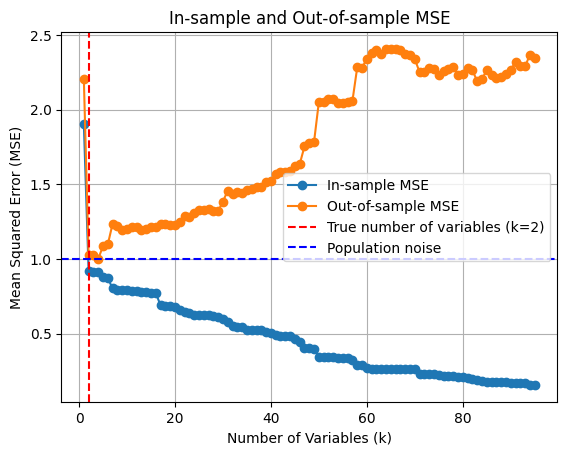

In [9]:
fitting_plot(n_total, in_sample_mse_ridge, out_sample_mse_ridge)